In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 解題步驟：

1. 將 train.csv, test.csv 合併
2. 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
3. 分別以平均值及中位數來填補缺失值
4. 分析缺失值，練習繪製直方圖及機率圖 (如下圖)
5. 分別計算原本、以平均值填補、以中位數填補的標準差
6. 課後問答

<img src="./data/hist_plot.png" style="zoom:100%;" />

## Hint

* [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [seaborn.histplot](


## 讀取資料

In [47]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
total = pd.concat([train, test], axis = 0)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1361,70,RL,51.0,9842,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,189000
1091,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
1092,382,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,187750
1093,1414,20,RL,88.0,10994,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,COD,Abnorml,257000


## 分離目標

In [23]:
# 將目標分析欄位取出來
target1 = total.columns[total.columns=='LotFrontage']
target2 = total.columns[total.columns=='GarageYrBlt']
target3 = total.columns[total.columns=='MasVnrArea']

In [31]:
# 以平均值來填補缺失值
train[target1] = total[target1].fillna(total[target1].mean())
total[target2] = total[target2].fillna(total[target2].mean())
total[target3] = total[target3].fillna(total[target3].mean())
# 以中位數來填補缺失值
target1_median = total[target1].fillna(total[target1].median())
target2_median = total[target2].fillna(total[target2].median())
target3_median = total[target3].fillna(total[target3].median())

## 繪圖

In [48]:
def plot_xy(x1, y1, x2, y2):
    plt.figure(figsize = (16, 6), dpi = 70)
    plt.subplot(1, 2, 1, title = 'Train')
    plt.scatter(x1, y1)

    plt.subplot(1, 2, 2, title = 'Test')
    plt.scatter(x2, y2)

    plt.show()
    
def plot_xy_bar(x1, y1, x2, y2):
    plt.figure(figsize = (16, 6), dpi = 70)
    plt.subplot(1, 2, 1, title = 'Train')
    plt.bar(x1, y1)

    plt.subplot(1, 2, 2, title = 'Test')
    plt.bar(x2, y2)

    plt.show()
    
def nan_analysis(feature, target = 'SalePrice'):
    x1 = train[feature]
    y1 = train[target]
    x2 = test[feature]
    y2 = test[target]
    plot_xy(x1, y1, x2, y2)
    plot_xy_bar(x1, y1, x2, y2)

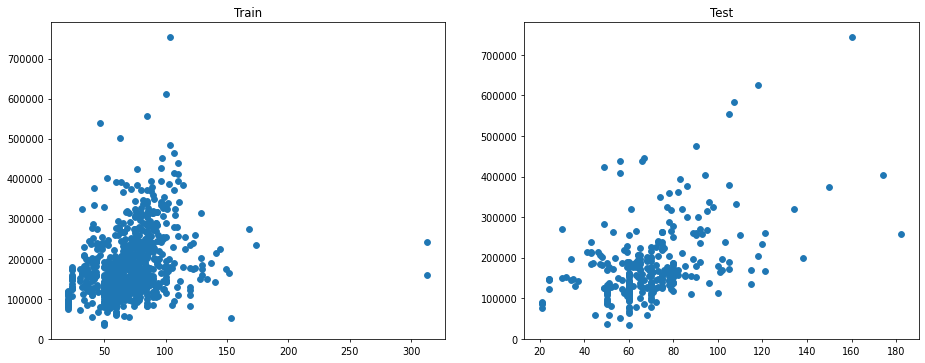

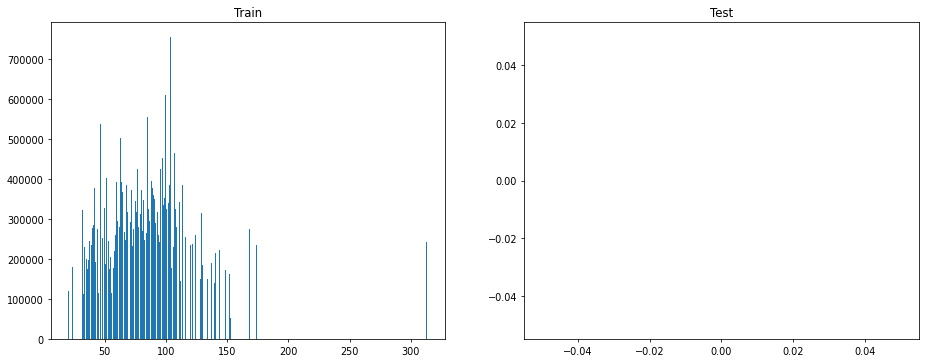

In [49]:
analysis_feature = 'LotFrontage'
nan_analysis(analysis_feature)

## 分析標準差

In [ ]:
""" Your code hear: """

## 透過分析標準差可以得到什麼結果？